In [2]:
import netCDF4
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
import datetime

In [3]:
# Open the priors file:
priors = netCDF4.Dataset("/nas/cee-water/cjgleason/marissa/Q_SWOT/SoS_notebooks/na_sword_v16_SOS_priors.nc", format="NETCDF4")

# Open the results file
results = netCDF4.Dataset("/nas/cee-water/cjgleason/marissa/Q_SWOT/SoS_notebooks/na_sword_v16_SOS_results.nc", format="NETCDF4")

In [5]:
# Display the priors groups
print("Priors Groups:")
print(priors.groups)

Priors Groups:
{'reaches': <class 'netCDF4._netCDF4.Group'>
group /reaches:
    dimensions(sizes): 
    variables(dimensions): int64 reach_id(num_reaches), float64 x(num_reaches), float64 y(num_reaches), <class 'str'> river_name(num_reaches)
    groups: , 'nodes': <class 'netCDF4._netCDF4.Group'>
group /nodes:
    dimensions(sizes): 
    variables(dimensions): int64 node_id(num_nodes), int64 reach_id(num_nodes), float64 x(num_nodes), float64 y(num_nodes), <class 'str'> river_name(num_nodes)
    groups: , 'model': <class 'netCDF4._netCDF4.Group'>
group /model:
    dimensions(sizes): num_months(12), probability(20)
    variables(dimensions): int32 num_months(num_months), int32 probability(probability), float64 flow_duration_q(num_reaches, probability), float64 max_q(num_reaches), float64 monthly_q(num_reaches, num_months), float64 mean_q(num_reaches), float64 min_q(num_reaches), float64 two_year_return_q(num_reaches), int32 area_estimate_flag(num_reaches)
    groups: , 'gbpriors': <class

In [6]:
# Display the module groups
print("Results Groups:")
print(results.groups)

Results Groups:
{'reaches': <class 'netCDF4._netCDF4.Group'>
group /reaches:
    dimensions(sizes): 
    variables(dimensions): int64 reach_id(num_reaches), float64 x(num_reaches), float64 y(num_reaches), <class 'str'> river_name(num_reaches), int32 observations(num_reaches), float64 time(num_reaches)
    groups: , 'nodes': <class 'netCDF4._netCDF4.Group'>
group /nodes:
    dimensions(sizes): 
    variables(dimensions): int64 node_id(num_nodes), int64 reach_id(num_nodes), float64 x(num_nodes), float64 y(num_nodes), <class 'str'> river_name(num_nodes), int32 observations(num_nodes), float64 time(num_nodes)
    groups: , 'prediagnostics': <class 'netCDF4._netCDF4.Group'>
group /prediagnostics:
    dimensions(sizes): 
    variables(dimensions): 
    groups: reach, node, 'momma': <class 'netCDF4._netCDF4.Group'>
group /momma:
    dimensions(sizes): 
    variables(dimensions): float64 stage(num_reaches), float64 width(num_reaches), float64 slope(num_reaches), float64 Qgage(num_reaches), flo

In [6]:
RIDS=results['reaches']['reach_id'][:].filled(np.nan)
sad=[74261000041, 74265000021, 74266300131, 74266300071, 74266700101,
       74266400031, 74266700051, 74266700141, 74266700201, 74266700171,
       74266400071, 74266400161, 74266700261, 74266400251, 74266800021,
       74266800071, 74266800031, 74266800131, 74267300111, 74266800151,
       74266400511, 74266900041, 74266900131, 74266400451, 74266400451,
       74266400451, 74266900081, 74266400671, 74266400591, 74266900151,
       74266400711, 74266400711, 74266900301, 74266900211, 74266400751,
       74266900491, 74266900511, 74265000121, 74267200031, 74267200121,
       74267200171, 74267200281, 74267300181, 74267300191, 74264700381,
       74267500041, 74267400131, 74267700141, 74264900071, 74269900761,
       74262700531, 74262700551, 74262800311, 74262800351, 74262800371,
       74267600061, 74267600091, 74267600101, 74267600121, 74267600221,
       74267600201, 74267600151, 74267600241, 74267800251, 74267800341,
       74267800201, 74267800051, 74267800151, 74267800141, 74267800091,
       74267800121, 74267800071, 74269400291, 74269400181, 74269400201,
       74269400041, 74269400331, 74269500051, 74269600111, 74269600101,
       74269600061, 74269600051, 74269700031, 74269900551, 74269800211,
       74269800111, 74269900431, 74269800051, 74269900071, 74269900191,
       74269900331, 74269900131, 74269900231, 74269900481, 74269900351,
       74269900271, 74269900811, 74269900521, 74269900701, 74262200241,
       74262200201, 74262200031, 74262200091, 74262200131, 74262200161,
       74264300091, 74262200271, 74262301081, 74262200321, 74262200361,
       74264300121, 74264400101, 74264600021, 74264600291, 74262800181,
       74262800281, 74262800251, 74268900281, 74268300081, 74268400011,
       74269200061, 74268400041, 74268500061, 74268600011, 74268700061,
       74268800021, 74268800051, 74269800381, 74268800131, 74269800481,
       74269800391]
#momma
momma=[74265000121,
    74266400251,74266400591,74266700141,74266800021,74266800131,74266800151,74267300181,74267600101,74267600151,74267600201
,74267800071
,74267800091
,74267800121
,74267800141
,74267800151
,74268600011
,74268800021
,74268900281
,74269400331
,74269600051
,74269800051
,74269800381
,74269900271
,74269900431
,74269900701]

#hivdi
hivdi=[74261000041,
74262200091
,74262200131
,74262200161
,74262200201
,74262200271
,74262200361
,74262301081
,74262800281
,74262800311
,74262800351
,74264300091
,74264300121
,74264600021
,74264600291
,74264700381
,74265000021
,74265000121
,74266300071
,74266300131
,74266400031
,74266400251
,74266400511
,74266400591
,74266700051
,74266700101
,74266700141
,74266700171
,74266700201
,74266800031
,74266900151
,74266900491
,74266900511
,74267300191
,74267400131
,74267600061
,74269600061]
    
reach_int = np.intersect1d(sad, hivdi)
reach_num = np.intersect1d(reach_int, momma)
print(reach_num)

[74265000121 74266400251 74266400591 74266700141]


In [7]:
# Locate overlapping reach identifier
reach_ids = results['reaches']['reach_id'][:]
matches = np.isin(reach_ids, reach_num)
riv_indexes = np.where(matches)

riv_reach = results["reaches"]["reach_id"][riv_indexes]
print("River reach identifiers:")
print(riv_reach)

gauge_reach = priors["USGS"]["USGS_reach_id"][:]
print("Gauge reach identifiers:")
print(gauge_reach)

reach_overlap = np.intersect1d(gauge_reach, riv_reach)
print("Overlapping reaches:")
print(reach_overlap)

# Select the first reach
reach_id = reach_overlap[3]
print(f"Reach id selected: {reach_id}")

River reach identifiers:
[74265000121 74266400251 74266400591 74266700141]
Gauge reach identifiers:
[73282400081 73282100081 73282300331 ... 74298200361 74294900381
 74294700251]
Overlapping reaches:
[74265000121 74266400251 74266400591 74266700141]
Reach id selected: 74266700141


River reach identifiers:
[74265000121 74266400251 74266400591 74266700141]
Gauge reach identifiers:
[73282400081 73282100081 73282300331 ... 74298200361 74294900381
 74294700251]
Overlapping reaches:
[74265000121 74266400251 74266400591 74266700141]
Reach id selected: 74266700141
Number of gauge discharge values: 16185.
Number of HivDI discharge values: 6.
Number of MOMMA discharge values: 6.
Number of integrator HivDI discharge values: 6.
Number of integrator MOMMA discharge values: 6.
Days of observation overlap:
['20240131', '20240201', '20240210', '20240403', '20240413']
Gauge time:
 ['20240131' '20240201' '20240210' '20240403' '20240413']
Gauge discharge:
 [1308.23616 1277.08768  351.12832  739.06848 1087.36512]
HiVDI discharge:
 [484.93022774 352.70887625  56.12118285 198.56631326 288.83401223
 371.39161053]
MOMMA discharge:
 [2677.45036923 2405.3237471     8.27314382  304.88219408  387.00493171
 1002.26866895]
HiVDI MOI discharge:
 [-1.00000000e+12 -1.00000000e+12 -1.00000000e+1

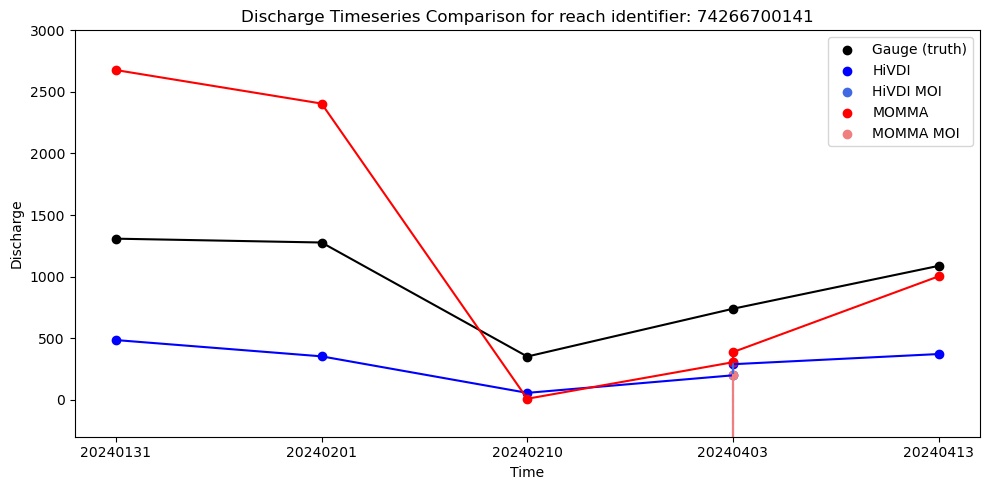

In [11]:
# Locate overlapping reach identifier
reach_ids = results['reaches']['reach_id'][:]
matches = np.isin(reach_ids, reach_num)
riv_indexes = np.where(matches)

riv_reach = results["reaches"]["reach_id"][riv_indexes]
print("River reach identifiers:")
print(riv_reach)

gauge_reach = priors["USGS"]["USGS_reach_id"][:]
print("Gauge reach identifiers:")
print(gauge_reach)

reach_overlap = np.intersect1d(gauge_reach, riv_reach)
print("Overlapping reaches:")
print(reach_overlap)

# Select the first reach
reach_id = reach_overlap[3]
print(f"Reach id selected: {reach_id}")

# Get reach index for gauge data
reach_gauge_index = np.where(gauge_reach == reach_id)

# Get discharge and filter out missing values
missing = priors["USGS"]["USGS_q"]._FillValue
gauge_discharge = priors["USGS"]["USGS_q"][reach_gauge_index].filled()[0]
nonmissing_indexes_g = np.where(gauge_discharge != missing)
gauge_discharge = gauge_discharge[nonmissing_indexes_g]
print(f"Number of gauge discharge values: {len(gauge_discharge)}.")

# Get time and filter out missing values
gauge_time = priors["USGS"]["USGS_qt"][reach_gauge_index].filled().astype(int)[0]
gauge_time = gauge_time[nonmissing_indexes_g]

# Convert time from ordinal value
gauge_time = [ datetime.datetime.fromordinal(gt).strftime("%Y%m%d") for gt in gauge_time ]

# ---- HiVDI

# Locate the reach identifier and associated HiVDI discharge time series
reach_q_index = np.where(results['reaches']['reach_id'][:] == reach_id)
hivdi_discharge = results['hivdi']['Q'][reach_q_index][0]

# Filter out missing values
missing = results['hivdi']['Q'].missing_value
nonmissing_indexes_h = np.where(hivdi_discharge != missing)
hivdi_discharge = hivdi_discharge[nonmissing_indexes_h]
print(f"Number of HivDI discharge values: {len(hivdi_discharge)}.")

# Retrieve SWOT observation times and filter out missing values
hivdi_time = results['reaches']['time'][reach_q_index][0]
hivdi_time = hivdi_time[nonmissing_indexes_h]

# Convert to HiVDI time to same format as gauge agency time
swot_ts = datetime.datetime(2000,1,1,0,0,0)   # SWOT timestamp delta
hivdi_time = [ (swot_ts + datetime.timedelta(seconds=st)).strftime("%Y%m%d") for st in hivdi_time ]

# ---- MOMMA

# Locate the reach identifier and associated HiVDI discharge time series
reach_q_index = np.where(results['reaches']['reach_id'][:] == reach_id)
momma_discharge = results['momma']['Q'][reach_q_index][0]

# Filter out missing values
missing = results['momma']['Q'].missing_value
nonmissing_indexes_h = np.where(momma_discharge != missing)
momma_discharge = momma_discharge[nonmissing_indexes_h]
print(f"Number of MOMMA discharge values: {len(momma_discharge)}.")

# Retrieve SWOT observation times and filter out missing values
momma_time = results['reaches']['time'][reach_q_index][0]
momma_time = momma_time[nonmissing_indexes_h]

# Convert to HiVDI time to same format as gauge agency time
swot_ts = datetime.datetime(2000,1,1,0,0,0)   # SWOT timestamp delta
momma_time = [ (swot_ts + datetime.timedelta(seconds=st)).strftime("%Y%m%d") for st in momma_time ]

# --- MOI

# Locate MOI discharge results for HiVDI making sure to filter out missing values
moi_hivdi_q = results["moi"]["hivdi"]["q"][reach_q_index][0]
moi_hivdi_q = moi_hivdi_q[nonmissing_indexes_h]
print(f"Number of integrator HivDI discharge values: {len(moi_hivdi_q)}.")

# Locate MOI discharge results for HiVDI making sure to filter out missing values
moi_momma_q = results["moi"]["momma"]["q"][reach_q_index][0]
moi_momma_q = moi_momma_q[nonmissing_indexes_h]
print(f"Number of integrator MOMMA discharge values: {len(moi_momma_q)}.")

# ---- PRINT

# Find overlapping time between in situ and SWOT observations
obs_overlap = list(set(hivdi_time).intersection(set(gauge_time)))
obs_overlap.sort()
print("Days of observation overlap:")
print(obs_overlap)

# Get indexes of overlap for gauge, algorithm and integrator
gauge_overlap_index = np.where(np.in1d(gauge_time, obs_overlap))[0]
hivdi_overlap_index = np.where(np.in1d(hivdi_time, obs_overlap))[0]

# Retrieve time and discharge values for indexes
gauge_time = np.array(gauge_time)[gauge_overlap_index]
gauge_discharge = np.array(gauge_discharge)[gauge_overlap_index]
print("Gauge time:\n", gauge_time)
print("Gauge discharge:\n", gauge_discharge)

hivdi_time = np.array(hivdi_time)[hivdi_overlap_index]
hivdi_discharge = np.array(hivdi_discharge)[hivdi_overlap_index]
print("HiVDI discharge:\n", hivdi_discharge)

momma_time = np.array(momma_time)[hivdi_overlap_index]
momma_discharge = np.array(momma_discharge)[hivdi_overlap_index]
print("MOMMA discharge:\n", momma_discharge)

moi_hivdi_q = np.array(moi_hivdi_q)[hivdi_overlap_index]
print("HiVDI MOI discharge:\n", moi_hivdi_q)

moi_momma_q = np.array(moi_momma_q)[hivdi_overlap_index]
print("MOMMA MOI discharge:\n", moi_momma_q)

# ---- PLOT

import matplotlib.pyplot as plt

# Create a figure and a single axes
fig, ax = plt.subplots(figsize=(10, 5))

# Plot Gauge discharge
ax.scatter(gauge_time, gauge_discharge, color='black', label='Gauge (truth)')
ax.plot(gauge_time, gauge_discharge, color='black')

# Plot HiVDI discharge
ax.scatter(hivdi_time, hivdi_discharge, color='blue', label='HiVDI')
ax.plot(hivdi_time, hivdi_discharge, color='blue')

# Plot MOI discharge
ax.scatter(hivdi_time, moi_hivdi_q, color='royalblue', label='HiVDI MOI')
ax.plot(hivdi_time, moi_hivdi_q, color='royalblue', linestyle='--')

# Plot momma discharge
ax.scatter(momma_time, momma_discharge, color='red', label='MOMMA')
ax.plot(momma_time, momma_discharge, color='red')

# Plot MOI discharge
ax.scatter(hivdi_time, moi_momma_q, color='lightcoral', label='MOMMA MOI')
ax.plot(hivdi_time, moi_momma_q, color='lightcoral', linestyle='--')

# Set labels and title
ax.set_ylabel('Discharge')
ax.set_ylim([-300, 3000])
ax.set_xlabel('Time')
ax.set_title(f"Discharge Timeseries Comparison for reach identifier: {reach_id}")

# Improve layout and show plot
ax.legend()
plt.tight_layout()
plt.show()


#### Gauge (USGS)

In [93]:
# Locate MOI discharge results for HiVDI making sure to filter out missing values
moi_hivdi_q = results["moi"]["hivdi"]["q"][reach_q_index][0]
moi_hivdi_q = moi_hivdi_q[nonmissing_indexes_h]
print(f"Number of integrator HivDI discharge values: {len(moi_hivdi_q)}.")

# Find overlapping time between in situ and SWOT observations
obs_overlap = list(set(hivdi_time).intersection(set(gauge_time)))
obs_overlap.sort()
print("Days of observation overlap:")
print(obs_overlap)

# Get indexes of overlap for gauge, algorithm and integrator
gauge_overlap_index = np.where(np.in1d(gauge_time, obs_overlap))[0]
hivdi_overlap_index = np.where(np.in1d(hivdi_time, obs_overlap))[0]

# Retrieve time and discharge values for indexes
gauge_time = np.array(gauge_time)[gauge_overlap_index]
gauge_discharge = np.array(gauge_discharge)[gauge_overlap_index]
print("Gauge time:\n", gauge_time)
print("Gauge discharge:\n", gauge_discharge)

hivdi_time = np.array(hivdi_time)[hivdi_overlap_index]
hivdi_discharge = np.array(hivdi_discharge)[hivdi_overlap_index]
print("HiVDI time:\n", hivdi_time)
print("HiVDI discharge:\n", hivdi_discharge)

moi_hivdi_q = np.array(moi_hivdi_q)[hivdi_overlap_index]
print("MOI discharge:\n", moi_hivdi_q)

Number of integrator HivDI discharge values: 0.
Days of observation overlap:
['20240131', '20240201', '20240210', '20240403', '20240413']
Gauge time:
 ['20240131' '20240201' '20240210' '20240403' '20240413']
Gauge discharge:
 [1308.23616 1277.08768  351.12832  739.06848 1087.36512]
HiVDI time:
 ['20240131' '20240201' '20240210' '20240403' '20240403' '20240413']
HiVDI discharge:
 [484.93022774 352.70887625  56.12118285 198.56631326 288.83401223
 371.39161053]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [91]:
# Find overlapping time between in situ and SWOT observations
reach_q_index = np.where(results['reaches']['reach_id'][:] == reach_id)
obs_overlap = list(set(hivdi_time).intersection(set(gauge_time)))
obs_overlap.sort()
print("Days of observation overlap:")
print(obs_overlap)

# Get indexes of overlap for gauge, algorithm and integrator
gauge_overlap_index = np.where(np.in1d(gauge_time, obs_overlap))[0]
hivdi_overlap_index = np.where(np.in1d(hivdi_time, obs_overlap))[0]

# Retrieve time and discharge values for indexes
gauge_time = np.array(gauge_time)[gauge_overlap_index]
gauge_discharge = np.array(gauge_discharge)[gauge_overlap_index]
print("Gauge time:\n", gauge_time)
print("Gauge discharge:\n", gauge_discharge)

hivdi_time = np.array(hivdi_time)[hivdi_overlap_index]
hivdi_discharge = np.array(hivdi_discharge)[hivdi_overlap_index]
print("HiVDI time:\n", hivdi_time)
print("HiVDI discharge:\n", hivdi_discharge)

moi_hivdi_q = np.array(moi_hivdi_q)[hivdi_overlap_index]
print("MOI discharge:\n", moi_hivdi_q)

Number of integrator HivDI discharge values: 0.
Days of observation overlap:
['20240131', '20240201', '20240210', '20240403', '20240413']
Gauge time:
 ['20240131' '20240201' '20240210' '20240403' '20240413']
Gauge discharge:
 [1308.23616 1277.08768  351.12832  739.06848 1087.36512]
HiVDI time:
 ['20240131' '20240201' '20240210' '20240403' '20240403' '20240413']
HiVDI discharge:
 [484.93022774 352.70887625  56.12118285 198.56631326 288.83401223
 371.39161053]


IndexError: index 0 is out of bounds for axis 0 with size 0